In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from sklearn import linear_model


In [3]:
import statsmodels.api as sm

In [4]:
from sklearn.model_selection import train_test_split

In [46]:
n_in, n_out = 200, 10

In [47]:
X_in = np.random.multivariate_normal([1, 1], [[1,1.5], [1.5, 4]], n_in)
print(X_in)

[[ 1.05213949e+00  1.47765287e+00]
 [ 2.85250255e-01 -1.86165314e+00]
 [ 1.52196360e+00  1.45614464e+00]
 [ 9.53976397e-01  4.24680850e-01]
 [ 2.22974714e+00  2.74729105e+00]
 [ 1.45524778e-01 -7.35485855e-01]
 [-1.92660059e-01 -7.69199019e-01]
 [ 2.75131905e+00  2.31537388e+00]
 [ 1.11649273e+00  3.57347341e+00]
 [ 1.60588363e+00  8.48396948e-01]
 [ 2.00069040e+00  1.98110943e+00]
 [ 7.12913648e-01  1.98386206e+00]
 [ 1.12864890e+00  1.38119085e+00]
 [ 3.23797111e-01  8.51357444e-01]
 [ 9.52746035e-01  9.05083198e-01]
 [ 2.51763529e+00  1.09897718e+00]
 [ 2.50541081e+00  3.54087575e+00]
 [ 1.17128601e+00 -2.64920495e-01]
 [ 1.13181795e+00  2.82393082e+00]
 [ 1.05215763e-01 -5.00724972e-01]
 [ 2.21031786e+00  2.58562615e+00]
 [ 3.73927021e-01  9.38013406e-01]
 [ 6.55928448e-01 -2.63337261e-01]
 [ 5.46979400e-02 -5.37700405e-01]
 [ 6.11866548e-01  1.52874209e+00]
 [ 6.74759837e-01  3.55354386e-01]
 [ 2.64871166e+00  5.25873864e+00]
 [ 7.69975787e-01 -5.63727883e-01]
 [-4.44959228e-01  2

In [48]:
X_out = np.random.multivariate_normal([2.5, 30], [[0.1, 0], [0, 0.1]], n_out)
print(X_out)

[[ 1.48855392 29.2724119 ]
 [ 3.00430945 30.45280405]
 [ 2.42742746 30.35403254]
 [ 2.35368261 29.6661473 ]
 [ 2.86706625 30.14852255]
 [ 2.12416984 29.97942188]
 [ 3.0178183  30.10431685]
 [ 2.89096683 29.97056258]
 [ 2.43876986 29.443472  ]
 [ 2.70580074 29.80678917]]


In [49]:
X = np.vstack((X_in, X_out))
print(X)

[[ 1.05213949e+00  1.47765287e+00]
 [ 2.85250255e-01 -1.86165314e+00]
 [ 1.52196360e+00  1.45614464e+00]
 [ 9.53976397e-01  4.24680850e-01]
 [ 2.22974714e+00  2.74729105e+00]
 [ 1.45524778e-01 -7.35485855e-01]
 [-1.92660059e-01 -7.69199019e-01]
 [ 2.75131905e+00  2.31537388e+00]
 [ 1.11649273e+00  3.57347341e+00]
 [ 1.60588363e+00  8.48396948e-01]
 [ 2.00069040e+00  1.98110943e+00]
 [ 7.12913648e-01  1.98386206e+00]
 [ 1.12864890e+00  1.38119085e+00]
 [ 3.23797111e-01  8.51357444e-01]
 [ 9.52746035e-01  9.05083198e-01]
 [ 2.51763529e+00  1.09897718e+00]
 [ 2.50541081e+00  3.54087575e+00]
 [ 1.17128601e+00 -2.64920495e-01]
 [ 1.13181795e+00  2.82393082e+00]
 [ 1.05215763e-01 -5.00724972e-01]
 [ 2.21031786e+00  2.58562615e+00]
 [ 3.73927021e-01  9.38013406e-01]
 [ 6.55928448e-01 -2.63337261e-01]
 [ 5.46979400e-02 -5.37700405e-01]
 [ 6.11866548e-01  1.52874209e+00]
 [ 6.74759837e-01  3.55354386e-01]
 [ 2.64871166e+00  5.25873864e+00]
 [ 7.69975787e-01 -5.63727883e-01]
 [-4.44959228e-01  2

In [50]:
x, y = X[:,0].reshape(-1, 1), X[:, 1]

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4)

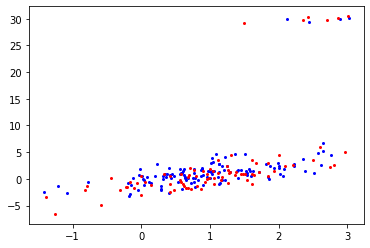

In [52]:
#plot data
plt.figure()
plt.scatter(x_train, y_train,4, color = 'b')
plt.scatter(x_test, y_test,4, color = 'r')


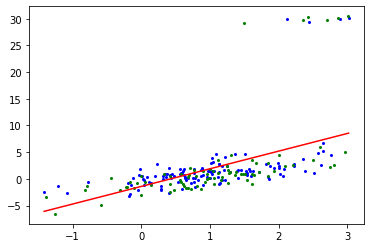

In [53]:
#fit OLS
X_train, X_test = sm.add_constant(x_train), sm.add_constant(x_test)
#print(X_test)
model_ols = sm.OLS(y_train, X_train).fit()
#предсказанные y
y_train_pred = model_ols.predict(X_train)
y_test_pred = model_ols.predict(X_test)

x_grid = np.linspace(np.min(x), np.max(x), 1000).reshape(-1, 1)
X_grid = sm.add_constant(x_grid)
y_pred = model_ols.predict(X_grid)

plt.figure()
plt.scatter(x_train, y_train,4, color = 'b')
plt.scatter(x_test, y_test,4, color = 'g')
plt.plot(x_grid, y_pred, 4, color = 'r')




НЕ правильный график

In [54]:
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     47.40
Date:                Sun, 06 Aug 2023   Prob (F-statistic):           2.57e-10
Time:                        12:48:31   Log-Likelihood:                -369.97
No. Observations:                 126   AIC:                             743.9
Df Residuals:                     124   BIC:                             749.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4048      0.630     -2.232      0.0

In [55]:
#остатки
e_train = y_train - y_train_pred
d_resid = np.sum((e_train - np.mean(e_train))**2)/len(e_train)

R2_train = 1 - d_resid/np.var(y_train)

e_test = y_test - y_test_pred
d_resid = np.sum((e_test - np.mean(e_test))**2)/len(e_test)
R2_test = 1 - d_resid/np.var(y_test)

print(f"R^2 on training set:{R2_train}")
print(f"R^2 on test set:{R2_test}")


R^2 on training set:0.27652511939863567
R^2 on test set:0.3102703864064942


(array([ 5.,  4., 23., 21., 25., 29., 10.,  4.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  1.,  1.]),
 array([-5.8098681 , -4.60267854, -3.39548897, -2.18829941, -0.98110984,
         0.22607972,  1.43326929,  2.64045885,  3.84764842,  5.05483798,
         6.26202755,  7.46921711,  8.67640668,  9.88359624, 11.09078581,
        12.29797537, 13.50516494, 14.7123545 , 15.91954407, 17.12673363,
        18.3339232 , 19.54111276, 20.74830233, 21.95549189, 23.16268146,
        24.36987102]),
 <a list of 25 Patch objects>)

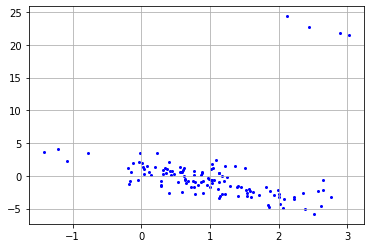

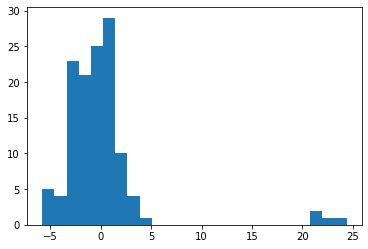

In [57]:
#plot residulas
plt.figure()
plt.scatter(x_train, e_train,4, color = 'b')
plt.grid()

plt.figure()
plt.hist(e_train, bins = 25)



Text(0.5, 1.0, 'robust')

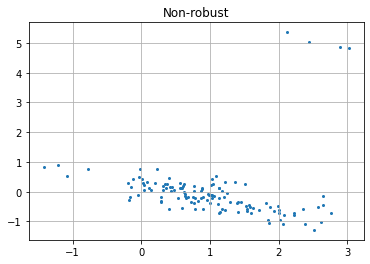

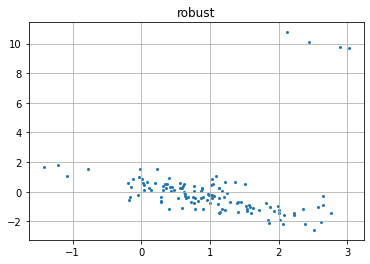

In [58]:
#standart residulas
H = X_train @ np.linalg.inv(X_train.T @ X_train) @ X_train.T
h = np.diagonal(H)

se = np.sqrt(model_ols.mse_resid)
e_st = e_train/(se * np.sqrt(1 - h))

plt.figure()
plt.scatter(x_train, e_st, 4)
plt.grid()
plt.title("Non-robust")

se_robust = np.median(np.abs(e_train))/0.675
e_st_robust = e_train/(se_robust * np.sqrt(1 - h))

plt.figure()
plt.scatter(x_train, e_st_robust, 4)
plt.grid()
plt.title("robust")




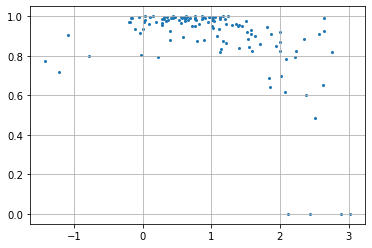

In [59]:
#weight

cb = 4.685
w = (1 - (e_st_robust/ cb) ** 2) ** 2
w[np.abs(e_st_robust) >= cb] = 0

plt.figure()
plt.scatter(x_train, w, 4)
plt.grid()
plt.sh

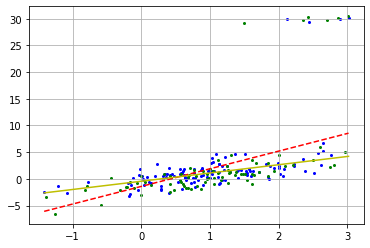

In [63]:
model_wls = sm.WLS(y_train, X_train, weights = w).fit()
y_train_pred = model_wls.predict(X_train)
y_test_pred = model_wls.predict(X_test)


y_wls_pred = model_wls.predict(X_grid)

plt.figure()
plt.scatter(x_train, y_train,4, color = 'b')
plt.scatter(x_test, y_test,4, color = 'g')
plt.plot(x_grid, y_pred,'--', color = 'r')
plt.plot(x_grid, y_wls_pred, color = 'y')
plt.grid()


In [64]:
print(model_wls.summary())

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.455
Model:                            WLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     103.5
Date:                Sun, 06 Aug 2023   Prob (F-statistic):           4.74e-18
Time:                        13:39:10   Log-Likelihood:                   -inf
No. Observations:                 126   AIC:                               inf
Df Residuals:                     124   BIC:                               inf
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4373      0.182     -2.406      0.0

C:\Users\42\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:762: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))
